**Problem Statement**


In this question, I am going to develop a machine learning model to predict e-commerce visitors purchasing intention. The given dataset contains shoppers online activity information including clickstream and session information data, where the last column Revenue represents visitors purchasing intention. Assigned tasks will include data exploration, data pre-processing, machine learning method selection, implementation, and model performance evaluation.

**Solution and Steps:-**
1. Data Exploration
2. Data Pre-processing
3. Model Implementation
4. Performance Evaluation
5. Result Analysis and Discussion





### **1) Data Exploration**

**A) Importing Libraries**

In [149]:
import pandas as pd
import numpy as np
#Importing Plotting Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
#Importing Mathematical Libraries
import math

#To support K mean
from sklearn.cluster import KMeans
#To support classification
from sklearn.datasets import make_classification
#To Support Plots
from matplotlib import pyplot
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#from sklearn.metrics import classification_report,accuracy_score
#from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor
#from sklearn.svm import OneClassSVM
#from pylab import rcParams

#To Support Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
#To support Linear SVC Classifier
from sklearn.svm import LinearSVC
#To support CalibratedClassifierCV
from sklearn.calibration import CalibratedClassifierCV
#To support GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#To support GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#To support confusion Matrix
from sklearn.metrics import confusion_matrix
#To support ROC and AUC curves
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')
import warnings #To ignore warnings
warnings.filterwarnings('ignore')

**B) Importing and Loading Data set**

In [150]:
dataset = pd.read_csv('Coursework_1_data.csv') # we used "dataset" as variable and called pandas dataframe "pd" for reading csv file with the help of pd.read_csv "file name"
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Checking size of the data in rows and columns**


In [75]:
print("The data has {} data points".format(dataset.shape[0]))
print("The data has {} features".format(dataset.shape[1]))
dataset.shape #Displays the total count of Rows and Colums details from the dataset.


The data has 12330 data points
The data has 18 features


(12330, 18)


**C) Data Features :-**

**Checking basic information from the data**

In [76]:
dataset.info() # Displays the category of each feature and it's details.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Checking numerical feautres from the data**

In [77]:
(dataset.describe()) # Displays the Numerical parameters (such as count, mean, standard deviation min and max deatils)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**Checking categorial feautres from the data**

In [79]:
#Repersenting Categorical Features
dataset.describe(include=[object])

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


**D) Finding Missing data**




In [80]:
dataset.isnull().sum().sum() #checking if data contains Null values

0

**(OR)**

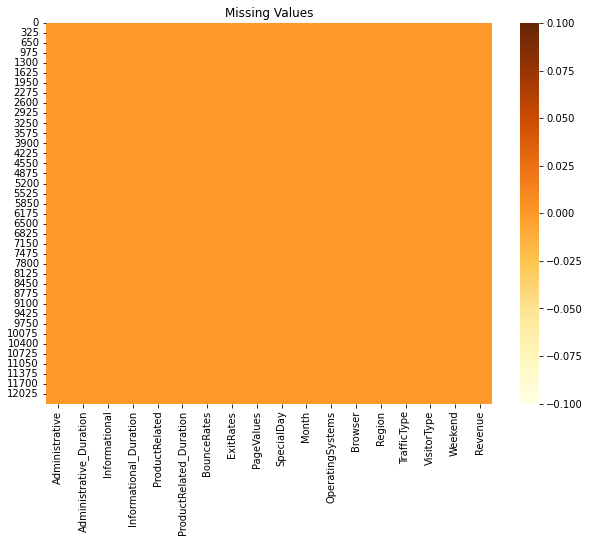

In [81]:
plt.figure(figsize=(10,7)) 
sns.heatmap(dataset.isna(), cmap='YlOrBr')
plt.title("Missing Values") 
plt.show()

**There are no missing entries in the data**

**E) Data Inspection**

**Histogram**

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


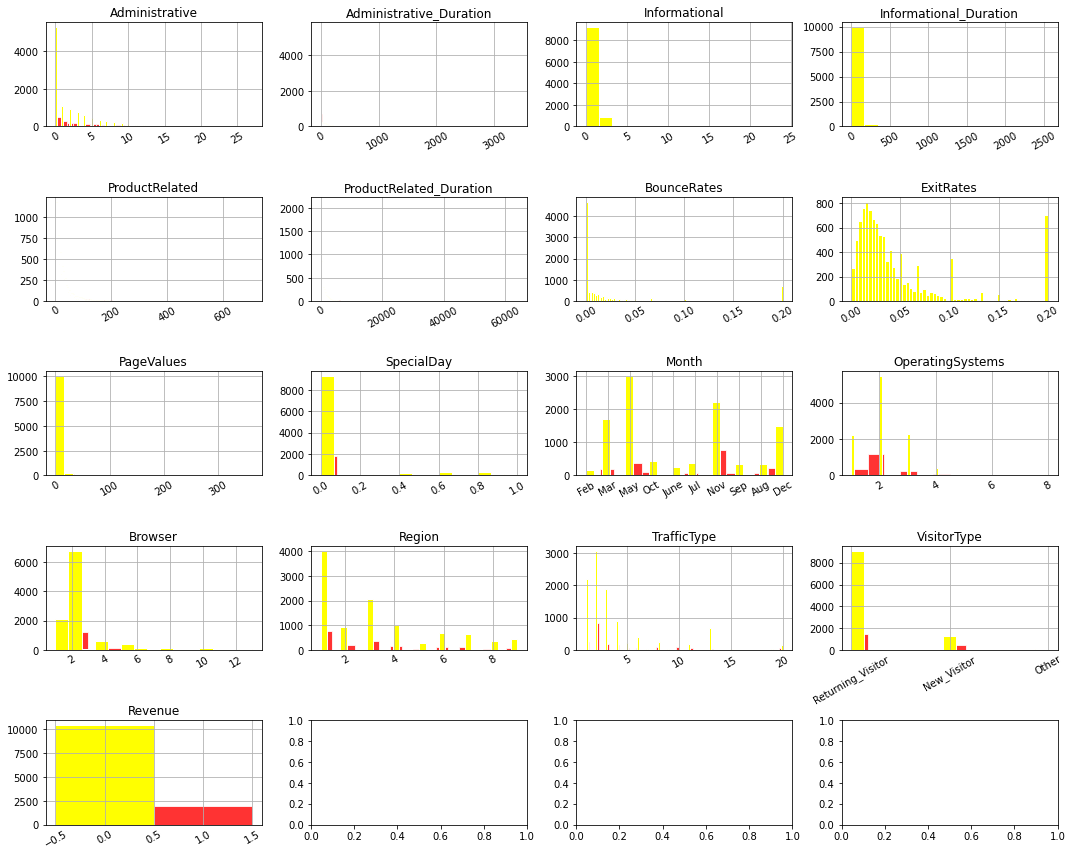

In [82]:
# Create histograms for feature columns separated by prediction label value
class_columnname = 'Revenue'

df_plot = dataset.copy().drop(['Weekend'], axis=1)
#register_matplotlib_converters()

list_length = df_plot.shape[1]
ncols = 4
nrows = int(round(list_length / ncols, 0))
if ncols * nrows < list_length:
    nrows += 1

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        featurename = df_plot.columns[i]
        ax = plt.subplot(nrows, ncols, i+1)
        y0 = df_plot[df_plot[class_columnname]==True][featurename]
        ax.hist(y0, color='red', alpha=0.8, label= featurename + f'-{class_columnname}', bins='auto', edgecolor='w')
        y1 = df_plot[df_plot[class_columnname]==False][featurename]
        ax.hist(y1, color='yellow', label=featurename + f'-No{class_columnname}', bins='auto', edgecolor='w')
        ax.set_title(featurename)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        plt.grid()   
fig.tight_layout()
plt.show()

**Scatter plot**

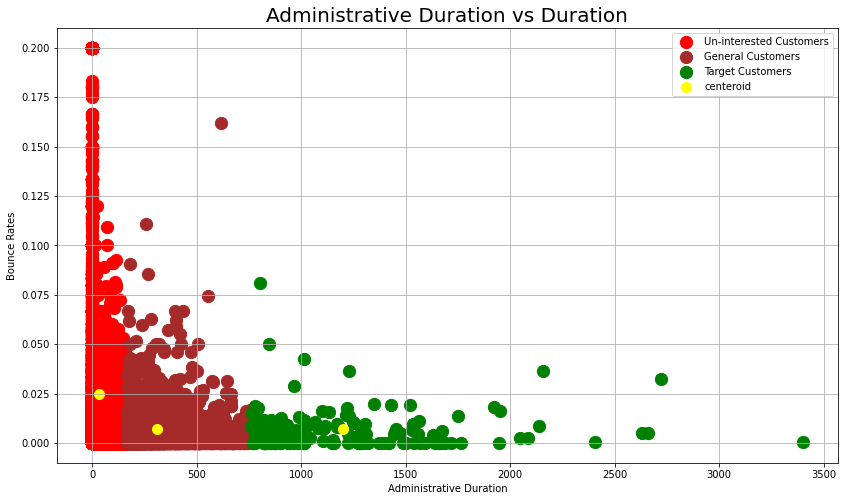

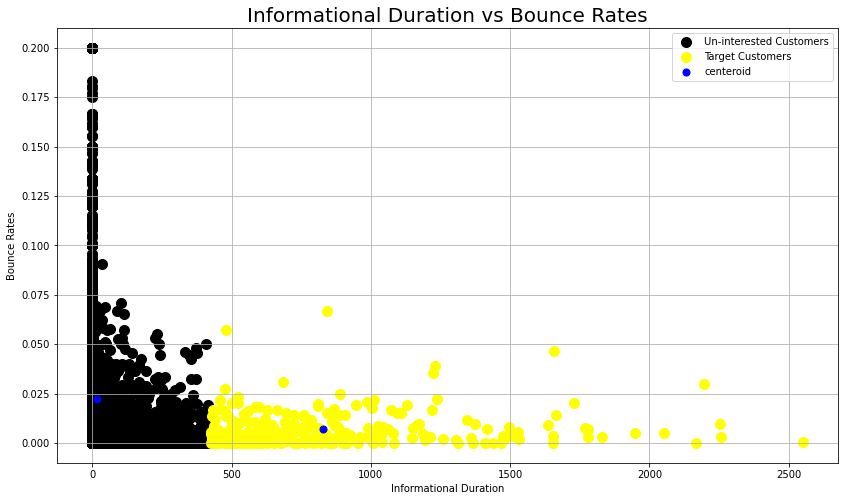

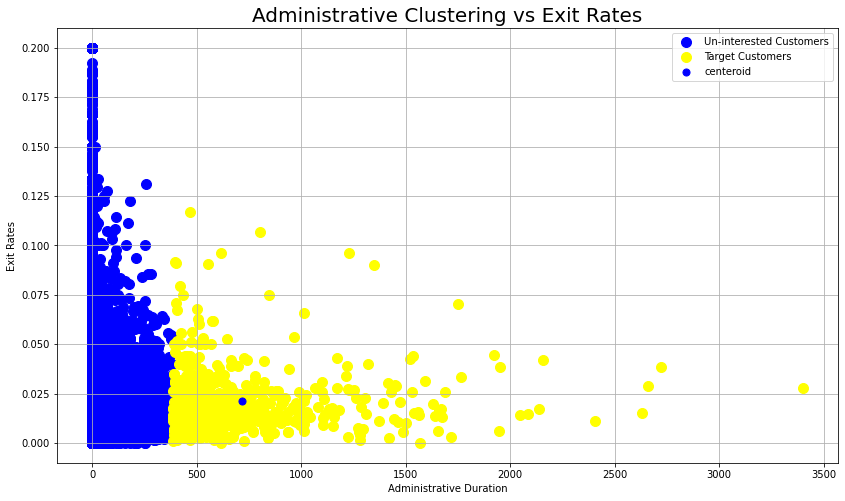

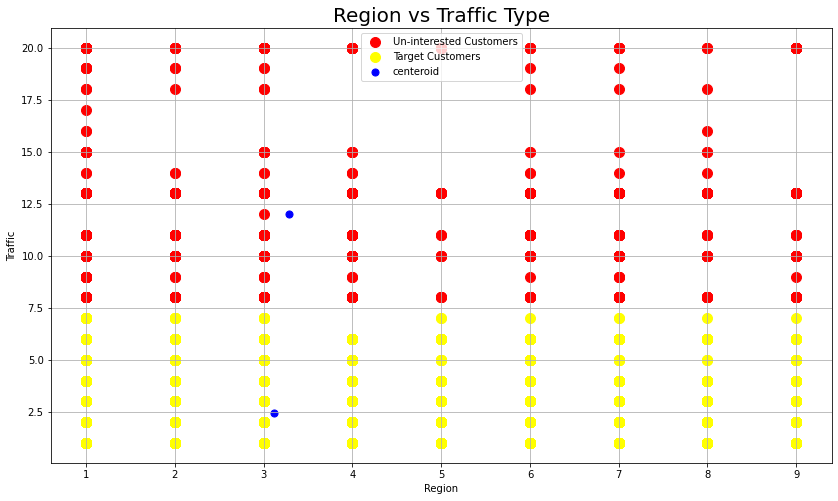

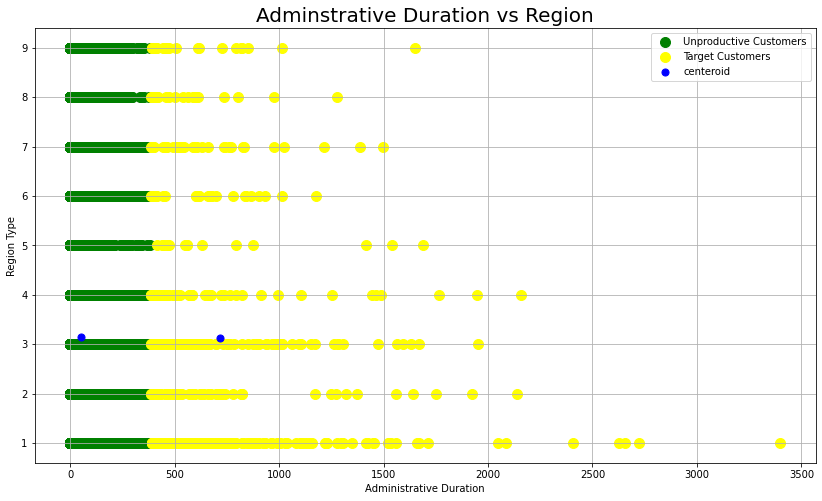

In [83]:
#Administrative duration vs Bounce rates
x = dataset.iloc[:, [1,6]].values
x.shape
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 150, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 150, c = 'brown', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 150, c = 'green', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 100, c = 'yellow' , label = 'centeroid')
plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

# informational duration vs Bounce Rates
x = dataset.iloc[:, [3, 6]].values
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'black', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

# Informational duration Administrative Clustering vs Exit rates
x = dataset.iloc[:, [1, 7]].values
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()


# informational duration Region vs Bounce Rates
x = dataset.iloc[:, [13, 14]].values
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

# informational duration vs Bounce Rates
x = dataset.iloc[:, [1, 13]].values
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()


**Box Plot**

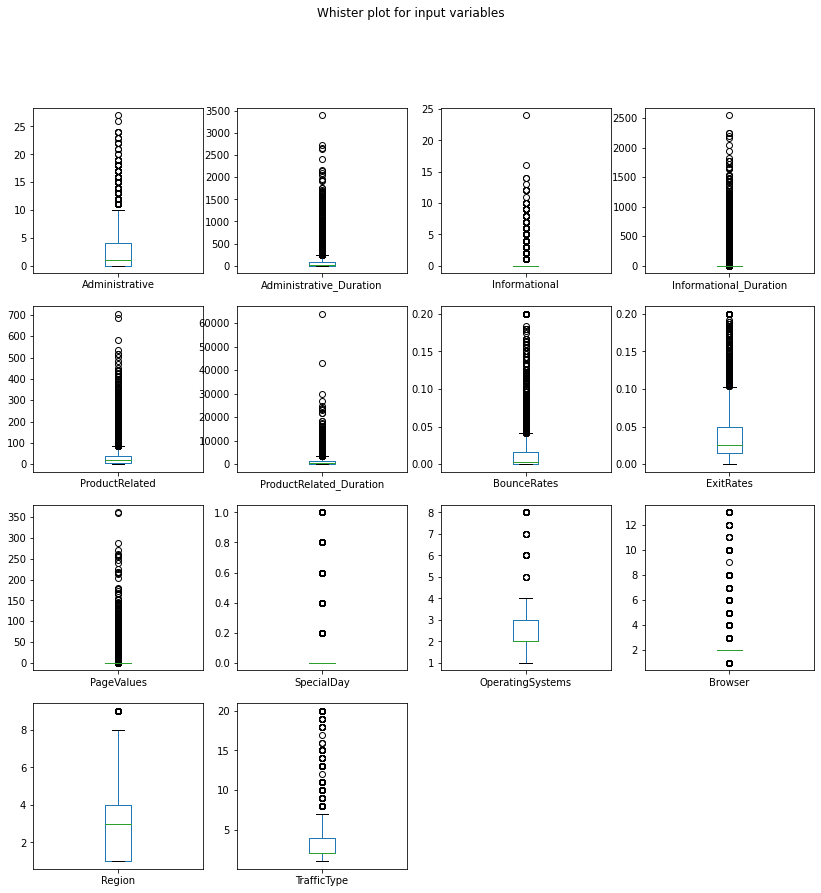

In [84]:
# Whiskerplots
c= 'yellow'
dataset.drop('Revenue', axis=1).plot(kind='box', subplots=True, layout=(4,4), 
sharex=False, sharey=False, 
figsize=(14,14), 
title='Whister plot for input variables')
plt.show()

**F) Handling Outliers for the dataset**

In [85]:
# 1) Administrative and duration
i = 90
while i<=100:
  print("{} The obtained percentile value is {}".format(i, np.percentile(dataset['Administrative'], i)))
  i+=1

90 The obtained percentile value is 7.0
91 The obtained percentile value is 7.0
92 The obtained percentile value is 8.0
93 The obtained percentile value is 8.0
94 The obtained percentile value is 9.0
95 The obtained percentile value is 9.0
96 The obtained percentile value is 10.0
97 The obtained percentile value is 11.0
98 The obtained percentile value is 12.0
99 The obtained percentile value is 14.0
100 The obtained percentile value is 27.0


There are few customers who visited more than 14 pages and we will replace them with the median value

In [87]:
val = dataset['Administrative'].median()
dataset['Administrative'] = dataset['Administrative'].apply(lambda x : val if x>=14 else x)

In [89]:
# customer Duration on Administrative pages
i = 90
while i<=100:
    print("{} The obtained percentile value is {}".format(i, np.percentile(dataset['Administrative_Duration'], i)))
    i+=1

90 The obtained percentile value is 224.88750000000005
91 The obtained percentile value is 241.856875016
92 The obtained percentile value is 261.11009526400005
93 The obtained percentile value is 284.0
94 The obtained percentile value is 313.92300001600006
95 The obtained percentile value is 348.26636905999936
96 The obtained percentile value is 398.05600002799997
97 The obtained percentile value is 471.5164666709999
98 The obtained percentile value is 594.1526666860002
99 The obtained percentile value is 830.5870409259969
100 The obtained percentile value is 3398.75


From the above output we could see 3398 is not a normal amount of time a person would spend on these pages. 
So we are going to replace them with median value

In [90]:
val = dataset['Administrative_Duration'].median()
dataset['Administrative_Duration'] = dataset['Administrative_Duration'].apply(lambda x : val if x>=830 else x)

In [91]:
# 2) Informational and Duration
i = 90
while i<=100:
    print("{} The obtained percentile value is {}".format(i, np.percentile(dataset['Informational'], i)))
    i+=1

90 The obtained percentile value is 2.0
91 The obtained percentile value is 2.0
92 The obtained percentile value is 2.0
93 The obtained percentile value is 2.0
94 The obtained percentile value is 3.0
95 The obtained percentile value is 3.0
96 The obtained percentile value is 3.0
97 The obtained percentile value is 4.0
98 The obtained percentile value is 5.0
99 The obtained percentile value is 6.0
100 The obtained percentile value is 24.0


From the above output we can see there are few customers who visited more than 6 pages and we will replace them with median value

In [92]:
val = dataset['Informational'].median()
dataset['Informational'] = dataset['Informational'].apply(lambda x : val if x>=6 else x)

In [93]:
# Duraton on Informational Pages
i = 90
while i<=100:
    print("{} The obtained percentile value  {}".format(i, np.percentile(dataset['Informational_Duration'], i)))
    i+=1

90 The obtained percentile value  72.0
91 The obtained percentile value  89.5
92 The obtained percentile value  105.98400000000001
93 The obtained percentile value  125.0
94 The obtained percentile value  154.96333330000013
95 The obtained percentile value  195.0
96 The obtained percentile value  245.96800000000002
97 The obtained percentile value  312.7824999999998
98 The obtained percentile value  433.26800000000003
99 The obtained percentile value  716.3899999999921
100 The obtained percentile value  2549.375


From the above data we could see that "2549.375" is not a normal amount of time a person would spend on these pages. So we'll replace them with median value

In [95]:
val = dataset['Informational_Duration'].median()
dataset['Informational_Duration'] = dataset['Informational_Duration'].apply(lambda x : val if x>=430 else x)

In [96]:
# 3. Product related and Duration
i = 90
while i<=100:
    print("{} The obtained percentile value is {}".format(i, np.percentile(dataset['ProductRelated'], i)))
    i+=1

90 The obtained percentile value is 74.0
91 The obtained percentile value is 80.0
92 The obtained percentile value is 84.68000000000029
93 The obtained percentile value is 91.0
94 The obtained percentile value is 99.0
95 The obtained percentile value is 109.0
96 The obtained percentile value is 122.0
97 The obtained percentile value is 138.0
98 The obtained percentile value is 162.0
99 The obtained percentile value is 221.0
100 The obtained percentile value is 705.0


There are few customers who visited more than 221 pages and we will replace them with before percentile value

In [97]:
val = dataset['ProductRelated'].median()
dataset['ProductRelated'] = dataset['ProductRelated'].apply(lambda x : val if x>=162 else x)

In [100]:
#Duration on Product related pages
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(dataset['ProductRelated_Duration'], i)))
    i+=1

90 percentile value 2122.6904549
91 percentile value 2225.0211667100007
92 percentile value 2346.01828664
93 percentile value 2476.0676453300034
94 percentile value 2602.3938329000007
95 percentile value 2756.2049405999996
96 percentile value 2923.1296017600002
97 percentile value 3147.2896206499995
98 percentile value 3374.3946670000005
99 percentile value 3646.7671820899996
100 percentile value 3998.333333


From the above obtained data we could see 5000 is not a normal amount of time a person would spend on these pages. So we'll replace them with before percentile values

In [101]:
val = dataset['ProductRelated_Duration'].median()
dataset['ProductRelated_Duration'] = dataset['ProductRelated_Duration'].apply(lambda x : val if x>=4000 else x)

In [102]:
# 4. Bounce and exit rates
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(dataset['BounceRates'], i)))
    i+=1

90 percentile value 0.05819696950000005
91 percentile value 0.066666667
92 percentile value 0.08
93 percentile value 0.1
94 percentile value 0.14285714300000002
95 percentile value 0.2
96 percentile value 0.2
97 percentile value 0.2
98 percentile value 0.2
99 percentile value 0.2
100 percentile value 0.2


There are more points that are greater than 0.1 and we'll replace them with the median value

In [103]:
val = dataset['BounceRates'].median()
dataset['BounceRates'] = dataset['BounceRates'].apply(lambda x : val if x>=0.1 else x)

In [104]:
# Exit Rates
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(dataset['ExitRates'], i)))
    i+=1

90 percentile value 0.1
91 percentile value 0.10094155665000021
92 percentile value 0.12222222199999999
93 percentile value 0.14237651473000185
94 percentile value 0.16944642846000058
95 percentile value 0.2
96 percentile value 0.2
97 percentile value 0.2
98 percentile value 0.2
99 percentile value 0.2
100 percentile value 0.2


From the above data we could see there were more points that are more than 0.16 and we'll replace them with the median value

In [105]:
val = dataset['ExitRates'].median()
dataset['ExitRates'] = dataset['ExitRates'].apply(lambda x : val if x>=0.16 else x)

In [106]:
# 5. Page Value
i = 90
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(dataset['PageValues'], i)))
    i+=1

90 percentile value 18.855502398000006
91 percentile value 21.2112655
92 percentile value 24.323797857200017
93 percentile value 28.050553845000014
94 percentile value 32.83145658880001
95 percentile value 38.16052827749995
96 percentile value 44.6038616144
97 percentile value 53.11700328179998
98 percentile value 62.80135189440001
99 percentile value 85.49849043159924
100 percentile value 361.76374189999996


There are more points that are more than 85 and we'll replace them with the median value

In [107]:
val = dataset['PageValues'].median()
dataset['PageValues'] = dataset['PageValues'].apply(lambda x : val if x>=85 else x)

In [109]:
# 6. Special Day
i = 80
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(dataset['SpecialDay'], i)))
    i+=1

80 percentile value 0.0
81 percentile value 0.0
82 percentile value 0.0
83 percentile value 0.0
84 percentile value 0.0
85 percentile value 0.0
86 percentile value 0.0
87 percentile value 0.0
88 percentile value 0.0
89 percentile value 0.0
90 percentile value 0.2
91 percentile value 0.2
92 percentile value 0.4
93 percentile value 0.4
94 percentile value 0.6
95 percentile value 0.6
96 percentile value 0.6
97 percentile value 0.8
98 percentile value 0.8
99 percentile value 1.0
100 percentile value 1.0


90% of the data is 0, so it makes sense to convert this feature into a categorical on having close=1 and not close=0

In [110]:
dataset['SpecialDay'] = np.where(dataset['SpecialDay']==0, 0, 1)

**F) Correlation**

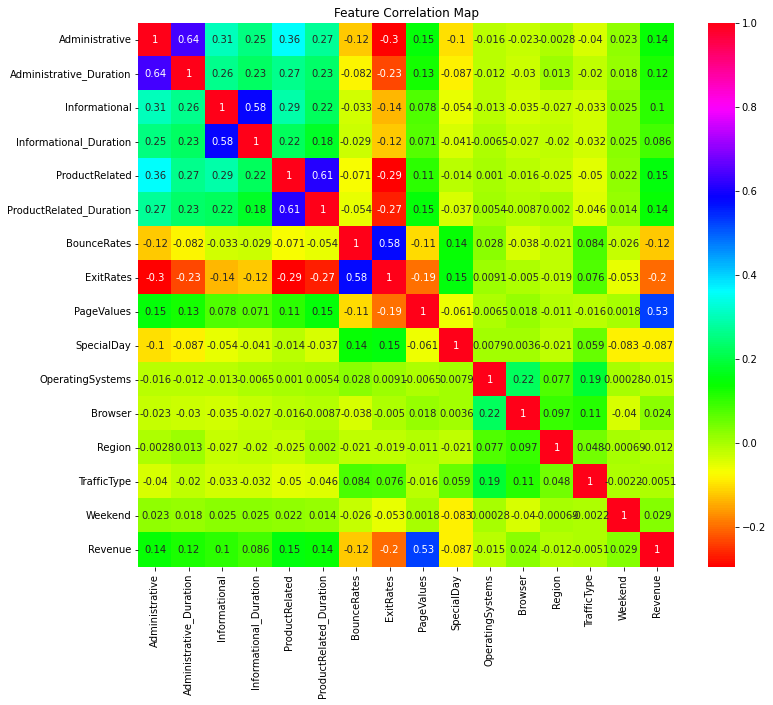

In [111]:
dataset['Revenue'] = np.where(dataset['Revenue']==True, 1, 0)
pyplot.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), annot=True, cmap='hsv')
pyplot.title("Feature Correlation Map")
pyplot.show()

From the above we could see features like "Informational and duration", "Special day", "Operating systems", "Region", "Traffic Type", "Browser", "Weekend" are not correlated with the our prediction of target "Revenue". So it's better to drop these redundant features

In [112]:
unfavourable_columns = ['Informational', 'Informational_Duration', 'SpecialDay', 'OperatingSystems',
                     'Browser', 'Region', 'TrafficType',  'Weekend']
clean_data = dataset.drop(unfavourable_columns, axis=1)
clean_data.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Revenue
0,0.0,0.0,1.0,0.000000,0.003112,0.025156,0.0,Feb,Returning_Visitor,0
1,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,Feb,Returning_Visitor,0
2,0.0,0.0,1.0,0.000000,0.003112,0.025156,0.0,Feb,Returning_Visitor,0
3,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,Feb,Returning_Visitor,0
4,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,Feb,Returning_Visitor,0


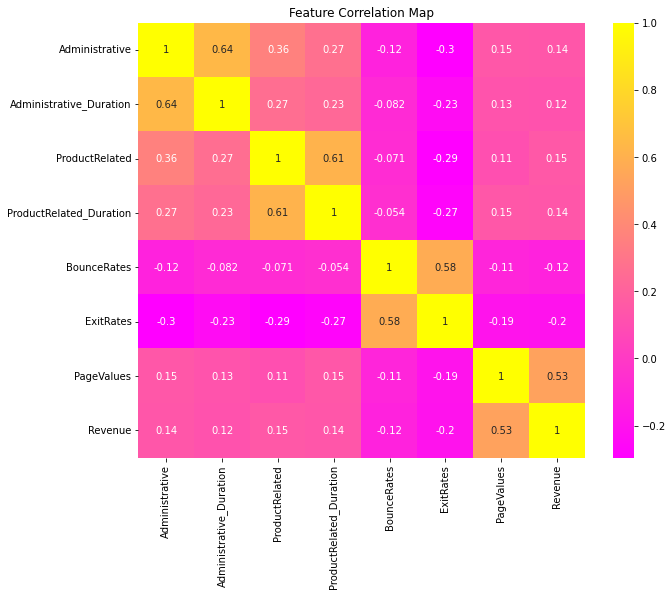

In [113]:
pyplot.figure(figsize=(10,8))
sns.heatmap(clean_data.corr(), annot=True, cmap='spring')
pyplot.title("Feature Correlation Map")
pyplot.show()

**G) Checking for Class Balance**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


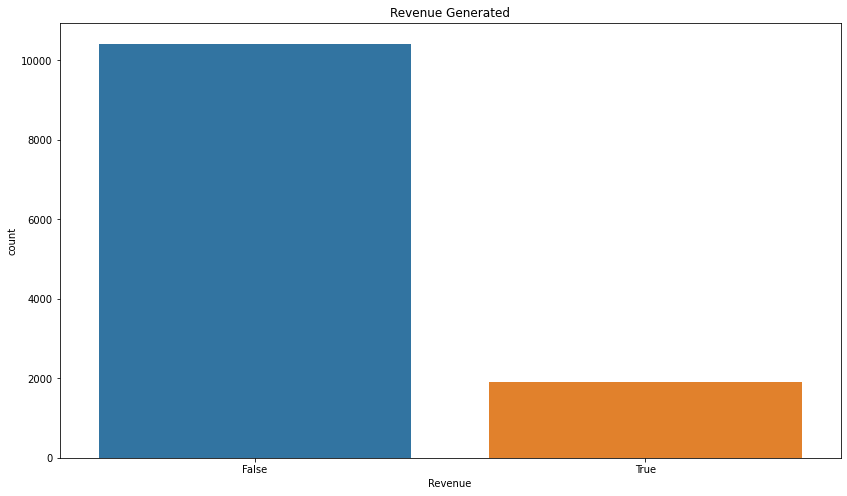

In [114]:
 # sns.countplot() is a method which is used to how the counts of observations in each categorical bin using bars.
k = sns.countplot(dataset['Revenue'])
k.set_xticklabels(['False','True'])
#displaying the title
plt.title("Revenue Generated")
plt.show()

In [115]:
true = len(dataset[dataset['Revenue']==True])
false = len(dataset[dataset['Revenue']==False])
print("There is a class Imbalance of {} to {}% in favour of {}"
      .format(
              round(true/len(dataset)*100,2),
              round(false/len(dataset)*100,2),
              dataset['Revenue'].value_counts().index[0]))

There is a class Imbalance of 15.47 to 84.53% in favour of 0


### **2) Data Pre-Processing**

In [116]:
from sklearn.model_selection import train_test_split
x_independent = clean_data.drop("Revenue", axis=1)
y_dependent = clean_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(x_independent, y_dependent, test_size=0.33, random_state=42)

#### Encoding Categorical features ####
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#Month
vectorizer.fit(X_train['Month'])
X_train_month = vectorizer.transform(X_train['Month'].values)
X_test_month = vectorizer.transform(X_test['Month'].values)

#Visitor type
vectorizer.fit(X_train['VisitorType'])
X_train_vistor = vectorizer.transform(X_train['VisitorType'].values)
X_test_vistor = vectorizer.transform(X_test['VisitorType'].values)

#### Encoding Numerical Features ####
from sklearn.preprocessing import Normalizer
norm = Normalizer()
num = clean_data.select_dtypes(include='number').columns
for feature in num:
    if feature=='Revenue':
        continue
    X_train[feature] = norm.fit_transform(X_train[feature].values.reshape(1,-1)).T
    X_test[feature] = norm.fit_transform(X_test[feature].values.reshape(1,-1)).T

In [117]:
X_train_final = np.hstack((X_train.select_dtypes(include='number').values,
                           X_train_vistor.toarray(), X_train_month.toarray()))
X_test_final = np.hstack((X_test.select_dtypes(include='number').values,
                          X_test_vistor.toarray(), X_test_month.toarray()))

In [118]:
print("Train before vectorization: ", X_train.shape)
print("Test before vectorization: ", X_test.shape)
print("Train after vectorization: ", X_train_final.shape)
print("Test after vectorization: ", X_test_final.shape)

Train before vectorization:  (8261, 9)
Test before vectorization:  (4069, 9)
Train after vectorization:  (8261, 20)
Test after vectorization:  (4069, 20)


### **3) Model Implementation**

# A) DECISION TREE

In [119]:
classifier = DecisionTreeClassifier(class_weight = 'balanced') # class_weight is a dictionary that defines each class label
#best depth in range [1, 5, 10, 50], and the best min_samples_split in range [5, 10, 100, 500]
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split':  [5, 10, 100, 500]}
clf_dt = GridSearchCV(classifier, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf_dt.fit(X_train_final, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [42]:
results = pd.DataFrame.from_dict(clf_dt.cv_results_)
results.sort_values('rank_test_score')[0:3]

#Extracting required features for the plotting
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_depth = results['param_max_depth']
min_sample_split = results['param_min_samples_split']
best_max_depth = clf_dt.best_params_['max_depth']
best_min_sample_split = clf_dt.best_params_['min_samples_split']


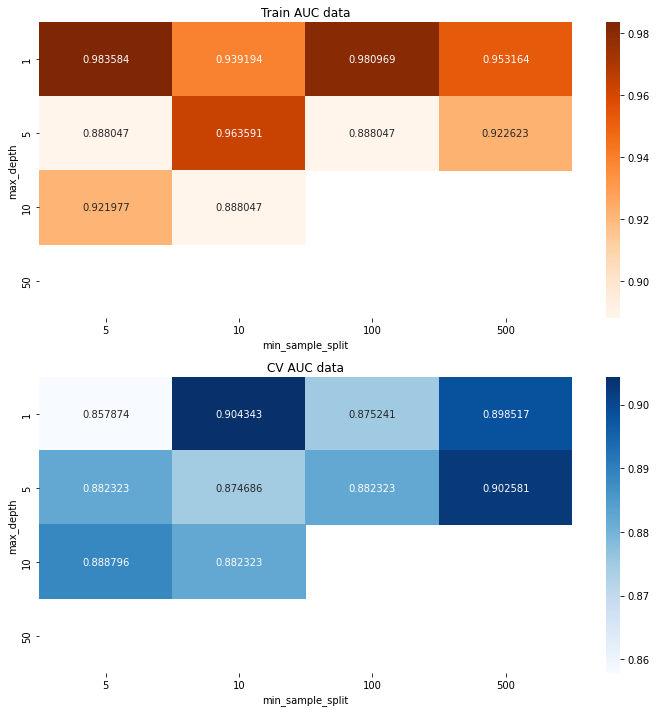

In [125]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
plt.rcParams['figure.figsize']=(7,7)

#For Train results
dataset = pd.DataFrame({'X': max_depth, 'Y': min_sample_split, 'Z': train_auc})
dataset_pivoted = dataset.pivot("X", "Y", "Z")
ax[0] = sns.heatmap(dataset_pivoted, annot=True, fmt="f", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('min_sample_split');
ax[0].set_ylabel('max_depth'); 
ax[0].set_title('Train AUC data', y=1.05);
ax[0].xaxis.set_ticklabels([5, 10, 100, 500]); 
ax[0].yaxis.set_ticklabels([1, 5, 10, 50]);

#For Cross validation results
data = pd.DataFrame({'X': max_depth, 'Y': min_sample_split, 'Z': cv_auc})
data_pivoted = data.pivot("X", "Y", "Z")
ax[1] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('min_sample_split');
ax[1].set_ylabel('max_depth'); 
ax[1].set_title('CV AUC data', y=1.05);
ax[1].xaxis.set_ticklabels([5, 10, 100, 500]); 
ax[1].yaxis.set_ticklabels([1, 5, 10, 50]);

plt.tight_layout()

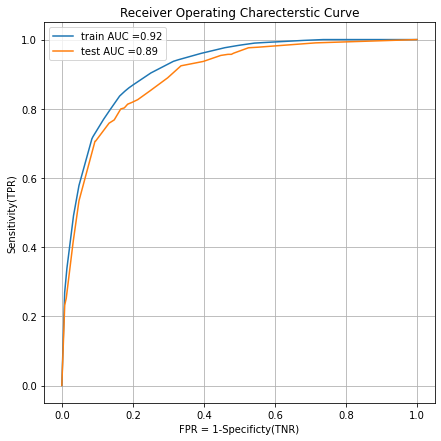

In [126]:
#Defining the best model with tuned hyperparameters
clf_best_DT = DecisionTreeClassifier(max_depth = best_max_depth, min_samples_split = best_min_sample_split,  class_weight = 'balanced')
clf_best_DT.fit(X_train_final, y_train)

#Plotting ROC curve on both train and test data

#Checking the performance of the model on test data using AUC as our metric
y_train_pred = clf_best_DT.predict_proba(X_train_final)[:,1]
y_test_pred = clf_best_DT.predict_proba(X_test_final)[:,1]

#getting tpr, fpr, thresholds using roc curve
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
dt_auc = round(auc(test_fpr, test_tpr),2)

#Plotting the ROC curve 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty(TNR)")
plt.ylabel("Sensitivity(TPR)")
plt.title("Receiver Operating Charecterstic Curve")
plt.grid()
plt.show()

In [127]:
def find_best_threshold(threshould, fpr, tpr):
    '''Function is to find the best threshold value i.e, threshold for which the value of TPR and TNR are maximum'''
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print("="*100)
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.7005401278747972 for threshold 0.578


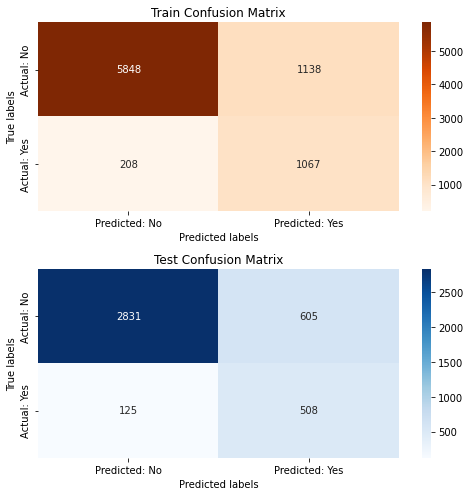

In [128]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('Predicted labels');
ax[0].set_ylabel('True labels'); 
ax[0].set_ylim(2.0, 0)
ax[0].set_title('Train Confusion Matrix');
ax[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted labels');ax[1].set_ylabel('True labels'); 
ax[1].set_ylim(2.0, 0)
ax[1].set_title('Test Confusion Matrix');
ax[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

In [129]:
from prettytable import PrettyTable
final_model = PrettyTable()
final_model.field_names = ["Modem Name", "Hyper Parameter", "AUC"]
final_model.add_row(["Decision Tree", str(best_max_depth)+'-'+str(best_min_sample_split), dt_auc])
print (final_model)

+---------------+-----------------+------+
|   Modem Name  | Hyper Parameter | AUC  |
+---------------+-----------------+------+
| Decision Tree |      10-500     | 0.89 |
+---------------+-----------------+------+


# B) LINEAR SVC

In [130]:
classifier_svm = LinearSVC()
parameters = {'C': np.logspace(-10, 1, num=400, endpoint=True, base=10.0, dtype=None, axis=0)}
classif_svm = RandomizedSearchCV(classifier_svm, parameters, cv = 5, scoring = "roc_auc", return_train_score = True)
classif_svm.fit(X_train_final,y_train)

RandomizedSearchCV(cv=5, estimator=LinearSVC(),
                   param_distributions={'C': array([1.00000000e-10, 1.06553795e-10, 1.13537112e-10, 1.20978102e-10,
       1.28906759e-10, 1.37355044e-10, 1.46357012e-10, 1.55948950e-10,
       1.66169525e-10, 1.77059935e-10, 1.88664080e-10, 2.01028738e-10,
       2.14203749e-10, 2.28242224e-10, 2.43200751e-10, 2.59139630e-10,
       2.76123110e-10, 2.94219653e-10, 3....
       2.32228110e+00, 2.47447864e+00, 2.63665090e+00, 2.80945159e+00,
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273e+00, 9.38493086e+00, 1.00000000e+01])},
                   return_train_score=True, scoring='roc_auc')

In [131]:
results_svm = pd.DataFrame.from_dict(classif_svm.cv_results_)
best_c_svm = (classif_svm.best_params_)["C"]
print("The best hyperparameter value is: ", best_c_svm)

The best hyperparameter value is:  1.5867234973483146


In [132]:
#Sorting based on the parameter
results_svm = results_svm.sort_values(['param_C'])
results_svm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.007400,0.000412,0.003162,0.000091,1.13537e-10,{'C': 1.1353711240885201e-10},0.596421,0.542215,0.583351,0.546111,0.621034,0.577826,0.030057,10,0.585947,0.555597,0.587881,0.598148,0.578653,0.581245,0.014258
3,0.007242,0.000177,0.003160,0.000142,5.91466e-10,{'C': 5.914660544591758e-10},0.596421,0.542218,0.583351,0.546111,0.621034,0.577827,0.030056,9,0.585947,0.555597,0.587882,0.598148,0.578653,0.581246,0.014258
9,0.009796,0.000385,0.003431,0.000073,7.23851e-07,{'C': 7.238509068173247e-07},0.596732,0.564133,0.583845,0.546636,0.621461,0.582561,0.025868,8,0.586417,0.572370,0.588275,0.598582,0.579105,0.584950,0.008848
0,0.011249,0.004583,0.004368,0.002081,1.87578e-06,{'C': 1.8757845627201612e-06},0.597344,0.590172,0.584651,0.547523,0.622185,0.588375,0.024123,7,0.587121,0.588906,0.588968,0.599266,0.579812,0.588814,0.006216
1,0.011793,0.000115,0.003289,0.000039,0.000140563,{'C': 0.00014056256518642135},0.689355,0.694261,0.678726,0.645638,0.696459,0.680888,0.018656,6,0.681796,0.678771,0.683664,0.692080,0.679401,0.683143,0.004797


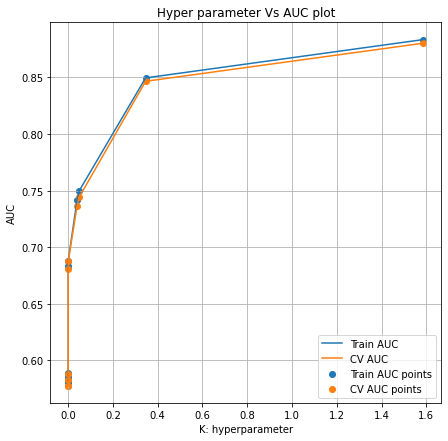

In [133]:
train_auc_svm = results_svm['mean_train_score']
cv_auc_svm = results_svm['mean_test_score'] 
C_svm =  results_svm['param_C']

plt.plot(C_svm, train_auc_svm, label='Train AUC')
plt.plot(C_svm, cv_auc_svm, label='CV AUC')
plt.scatter(C_svm, train_auc_svm, label='Train AUC points')
plt.scatter(C_svm, cv_auc_svm, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [134]:
base_model_SVM = LinearSVC(C = best_c_svm, class_weight='balanced') 
calibrated_SVM = CalibratedClassifierCV(base_estimator = base_model_SVM)
calibrated_SVM.fit(X_train_final, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.5867234973483146,
                                                class_weight='balanced'))

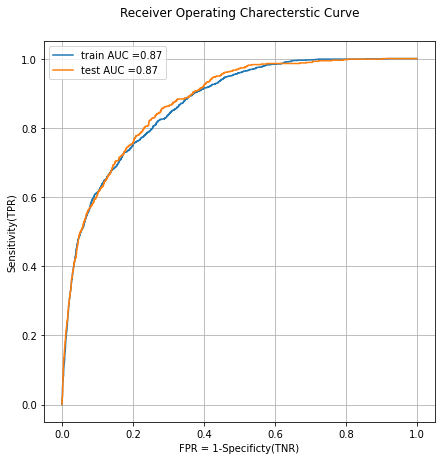

In [135]:
#Checking the performance of the model on test data using AUC as our metric
y_train_pred_svm = calibrated_SVM.predict_proba(X_train_final)[:,1]
y_test_pred_svm = calibrated_SVM.predict_proba(X_test_final)[:,1]

#getting tpr, fpr, thresholds using roc curve
train_fpr_svm, train_tpr_svm, tr_thresholds_svm = roc_curve(y_train, y_train_pred_svm)
test_fpr_svm, test_tpr_svm, te_thresholds_svm = roc_curve(y_test, y_test_pred_svm)
svm_auc = round(auc(test_fpr_svm, test_tpr_svm),2)

#Plotting the ROC curve 
plt.plot(train_fpr_svm, train_tpr_svm, label="train AUC ="+str(round(auc(train_fpr_svm, train_tpr_svm),2)))
plt.plot(test_fpr_svm, test_tpr_svm, label="test AUC ="+str(round(auc(test_fpr_svm, test_tpr_svm),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty(TNR)")
plt.ylabel("Sensitivity(TPR)")
plt.title("Receiver Operating Charecterstic Curve", y=1.05)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.6030200456936282 for threshold 0.16


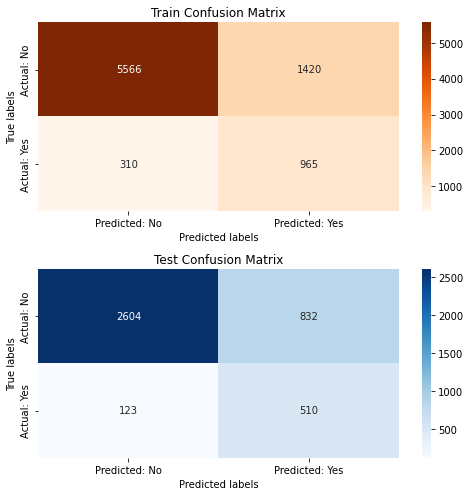

In [136]:
best_t_svm = find_best_threshold(tr_thresholds_svm, train_fpr_svm, train_tpr_svm)

train_confusion_matrix_svm = confusion_matrix(y_train, predict_with_best_t(y_train_pred_svm, best_t_svm))
test_confusion_matrix_svm = confusion_matrix(y_test, predict_with_best_t(y_test_pred_svm, best_t_svm))

fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix_svm, annot=True, fmt="d", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('Predicted labels');
ax[0].set_ylabel('True labels'); 
ax[0].set_ylim(2.0, 0)
ax[0].set_title('Train Confusion Matrix');
ax[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix_svm, annot=True, fmt="d", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted labels');ax[1].set_ylabel('True labels'); 
ax[1].set_ylim(2.0, 0)
ax[1].set_title('Test Confusion Matrix');
ax[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

In [137]:
from prettytable import PrettyTable
final_svc = PrettyTable()
final_svc.field_names = ["Model", "Hyper Parameter", "AUC"]
final_svc.add_row(["LinearSVC", round(best_c_svm,3), svm_auc])
print(final_svc)

+-----------+-----------------+------+
|   Model   | Hyper Parameter | AUC  |
+-----------+-----------------+------+
| LinearSVC |      1.587      | 0.87 |
+-----------+-----------------+------+


## **C) GradientBoostingClassifier**

In [138]:
clf = GradientBoostingClassifier()
parameters = {'n_estimators': [1, 10, 50, 100], 'learning_rate':  [0.2, 0.4, 0.6, 0.8]}
clf_gbdt = RandomizedSearchCV(clf, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf_gbdt.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8],
                                        'n_estimators': [1, 10, 50, 100]},
                   return_train_score=True, scoring='roc_auc')

In [139]:
results = pd.DataFrame.from_dict(clf_gbdt.cv_results_)
results.sort_values('rank_test_score')[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.485836,0.004630,0.005584,0.000417,50,0.2,"{'n_estimators': 50, 'learning_rate': 0.2}",0.895345,0.911590,0.906351,0.904429,0.006770,1,0.941799,0.935596,0.940188,0.939194,0.002628
4,0.099535,0.004330,0.003722,0.000112,10,0.4,"{'n_estimators': 10, 'learning_rate': 0.4}",0.895207,0.911986,0.900689,0.902627,0.006986,2,0.923970,0.921934,0.921966,0.922623,0.000952
8,0.954400,0.003797,0.007158,0.000681,100,0.2,"{'n_estimators': 100, 'learning_rate': 0.2}",0.894918,0.908755,0.903955,0.902543,0.005737,3,0.957373,0.954108,0.957513,0.956331,0.001573


In [140]:
#Extracting required parameters for the plotting
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
n_estimators = results['param_n_estimators']
learning_rate = results['param_learning_rate']
best_n_estimators = clf_gbdt.best_params_['n_estimators']
best_learning_rate = clf_gbdt.best_params_['learning_rate']

print("The best value for n_estimators of the model is: ", best_n_estimators)
print("The best value for learning rate of the model is: ", best_learning_rate)

The best value for n_estimators of the model is:  50
The best value for learning rate of the model is:  0.2


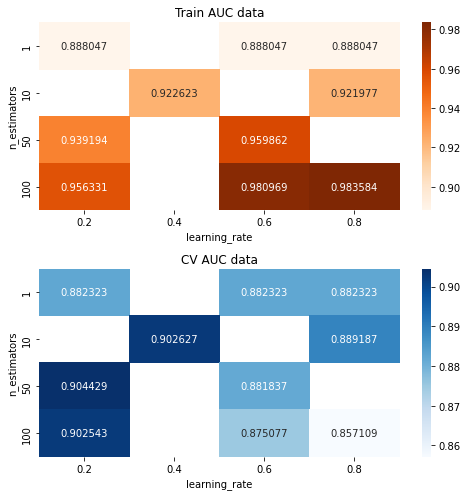

In [141]:
fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

#For Train results
data = pd.DataFrame({'X': n_estimators, 'Y': learning_rate, 'Z': train_auc})
data_pivoted = data.pivot("X", "Y", "Z")
ax[0] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('learning_rate');
ax[0].set_ylabel('n_estimators'); 
ax[0].set_title('Train AUC data', y=1.05);


#For Cross validation results
data = pd.DataFrame({'X': n_estimators, 'Y': learning_rate, 'Z': cv_auc})
data_pivoted = data.pivot("X", "Y", "Z")
ax[1] = sns.heatmap(data_pivoted, annot=True, fmt="f", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('learning_rate');
ax[1].set_ylabel('n_estimators'); 
ax[1].set_title('CV AUC data', y=1.05);

plt.tight_layout()

In [142]:
#Defining the best model with tuned hyperparameters
best_clf_gbdt = GradientBoostingClassifier(n_estimators = best_n_estimators, learning_rate = best_learning_rate)
best_clf_gbdt.fit(X_train_final, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)

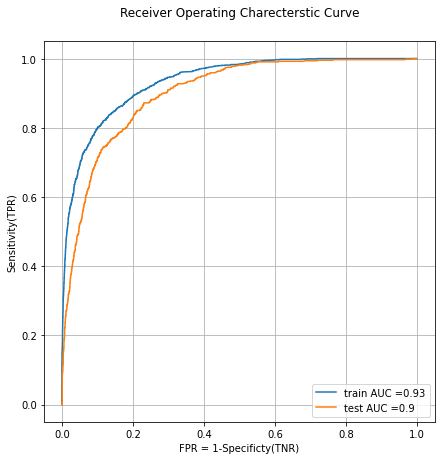

In [143]:
#Checking the performance of the model on test data using AUC as our metric
y_train_pred = best_clf_gbdt.predict_proba(X_train_final)[:,1]
y_test_pred = best_clf_gbdt.predict_proba(X_test_final)[:,1]

#getting tpr, fpr, thresholds using roc curve
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
gbdt_auc = round(auc(test_fpr, test_tpr),2)

#Plotting the ROC curve 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("FPR = 1-Specificty(TNR)")
plt.ylabel("Sensitivity(TPR)")
plt.title("Receiver Operating Charecterstic Curve", y=1.05)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.7266546538455062 for threshold 0.164


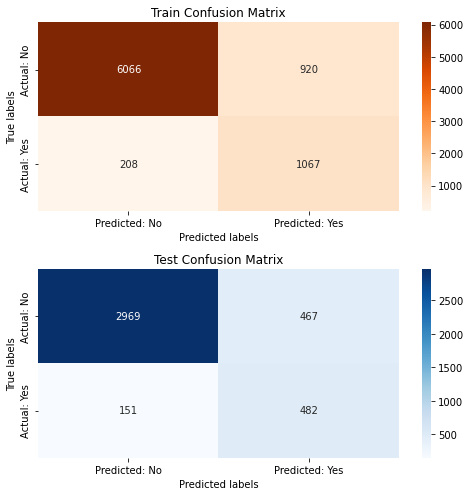

In [144]:
best_t_gbdt = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_confusion_matrix = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t_gbdt))
test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t_gbdt))


fig, ax = plt.subplots(nrows=2)
plt.rcParams['figure.figsize']=(7,7)

sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap='Oranges', ax=ax[0])
ax[0].set_xlabel('Predicted labels');
ax[0].set_ylabel('True labels'); 
ax[0].set_ylim(2.0, 0)
ax[0].set_title('Train Confusion Matrix');
ax[0].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[0].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap='Blues', ax=ax[1])
ax[1].set_xlabel('Predicted labels');ax[1].set_ylabel('True labels'); 
ax[1].set_ylim(2.0, 0)
ax[1].set_title('Test Confusion Matrix');
ax[1].xaxis.set_ticklabels(['Predicted: No','Predicted: Yes']); 
ax[1].yaxis.set_ticklabels(['Actual: No','Actual: Yes']);

plt.tight_layout()

In [146]:
from prettytable import PrettyTable

summary = PrettyTable()
summary.field_names = ["Model", "Hyper Parameter", "AUC"]
summary.add_row(["GradientBoostingClassifier", str(best_n_estimators)+'-'+str(best_learning_rate), gbdt_auc])
print(summary)

+----------------------------+-----------------+-----+
|           Model            | Hyper Parameter | AUC |
+----------------------------+-----------------+-----+
| GradientBoostingClassifier |      50-0.2     | 0.9 |
+----------------------------+-----------------+-----+


In [151]:
from prettytable import PrettyTable

summary = PrettyTable()
summary.field_names = ["Model", "Hyper Parameter", "AUC"]
summary.add_row(["Decision Tree", str(best_max_depth)+'-'+str(best_min_sample_split), dt_auc])
summary.add_row(["LinearSVC", round(best_c_svm,3), svm_auc])
summary.add_row(["GradientBoostingClassifier", str(best_n_estimators)+'-'+str(best_learning_rate), gbdt_auc])
print(summary)

+----------------------------+-----------------+------+
|           Model            | Hyper Parameter | AUC  |
+----------------------------+-----------------+------+
|       Decision Tree        |      10-500     | 0.89 |
|         LinearSVC          |      1.587      | 0.87 |
| GradientBoostingClassifier |      50-0.2     | 0.9  |
+----------------------------+-----------------+------+
